In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import ast
import os

In [5]:
def read(file):
    f = open(file,'r')
    dic = {}
    i = 0
    for line in f.readlines():
        if line == ';' or i > 4:
            i = 0
            continue
        if not i:
            param = tuple([int(float(x.split(':')[1])) for x in line.split(',')])
        elif i == 1:
            weight_change = np.array(ast.literal_eval(line))
        elif i == 2:
            pattern_change = np.array(ast.literal_eval(line))
        elif i == 3:
            lamb = np.array(ast.literal_eval(line))
        elif i == 4:
            loss = np.array(ast.literal_eval(line))
            if param[1]!=5 and 8000 not in param and min(lamb) > 0 and loss[-1] < 0.75 * loss[0] and max(pattern_change[0]) < 0.8 and max(pattern_change[1]) < 0.8 and max(weight_change[0]) < 100 and max(weight_change[1]) < 100 and param not in dic:
                #print('valid data:', param)
                dic[param] = (weight_change, pattern_change, lamb, loss,)
            else:
                #print('invalid lambda:', min(lamb))
                pass
        i += 1
    return dic

In [23]:
def plot_all(dataset_name='mnist', lr='lr2e-4', tail_name=['']):
    record = {}
    for i in tail_name:
        this = read(os.path.join('results', lr, dataset_name + i + '.txt'))
        for param in this:
            if param not in record:
                record[param] = this[param]
    record = dict(sorted(record.items()))
    print(record.keys())
    
    """
    plt.figure()  # weight change layer 1
    legend = []
    for param in record:
        if param[0] != 5:
            content = record[param]
            legend.append('h1='+str(param[0]))
            plt.plot(content[0][0])
    plt.title('Weight change in Frobenius norm (first hidden layer)')
    plt.xlabel('Number of iterations')
    plt.legend(legend, loc='upper right',bbox_to_anchor=(1.35, 1))
    plt.savefig(os.path.join('plots', lr, dataset_name + '_1.pdf'), bbox_inches='tight')
    """

    plt.figure()  # weight change layer 2
    legend = []
    for param in record:
        if param[1] != 5:
            content = record[param]
            legend.append('h2='+str(param[1]))
            plt.plot(content[0][1])
    plt.title('Weight change in Frobenius norm (second hidden layer)')
    plt.xlabel('Number of iterations')
    plt.legend(legend, loc='upper right',bbox_to_anchor=(1.3, 1))
    plt.savefig(os.path.join('plots', lr, dataset_name + '_1.pdf'), bbox_inches='tight')
    
    """
    plt.figure()  # pattern change layer 1
    legend = []
    for param in record:
        if param[0] != 5:
            content = record[param]
            legend.append('h1='+str(param[0]))
            plt.plot(content[1][0])
    plt.title('Percentage of pattern change (first hidden layer)')
    plt.xlabel('Number of iterations')
    plt.legend(legend, loc='upper right',bbox_to_anchor=(1.35, 1))
    plt.savefig(os.path.join('plots', lr, dataset_name + '_3.pdf'), bbox_inches='tight')
    """

    plt.figure()  # pattern change layer 2
    legend = []
    for param in record:
        if param[1] != 5:
            content = record[param]
            legend.append('h2='+str(param[1]))
            plt.plot(content[1][1])
    plt.title('Percentage of pattern change (second hidden layer)')
    plt.xlabel('Number of iterations')
    plt.legend(legend, loc='upper right',bbox_to_anchor=(1.3, 1))
    plt.savefig(os.path.join('plots', lr, dataset_name + '_2.pdf'), bbox_inches='tight')

    plt.figure()  # lambda
    legend = []
    for param in record:
        content = record[param]
        legend.append('h2='+str(param[1]))
        plt.plot(np.log(content[2]))
    plt.title('$\log(\lambda_{min})$')
    plt.xlabel('Number of iterations')
    plt.legend(legend, loc='upper right',bbox_to_anchor=(1.3, 1))
    plt.savefig(os.path.join('plots', lr, dataset_name + '_3.pdf'), bbox_inches='tight')

    plt.figure()  # loss
    legend = []
    for param in record:
        content = record[param]
        legend.append('h2='+str(param[1]))
        plt.plot(np.log(content[3]))
    plt.title('$\log(loss)$')
    plt.xlabel('Number of iterations')
    plt.legend(legend, loc='upper right',bbox_to_anchor=(1.3, 1))
    plt.savefig(os.path.join('plots', lr, dataset_name + '_4.pdf'), bbox_inches='tight')

    #plt.show()

dict_keys([(5, 100, 50), (5, 500, 50), (5, 1000, 50), (5, 2000, 50), (5, 4000, 50)])
dict_keys([(5, 100, 50), (5, 500, 50), (5, 1000, 50), (5, 2000, 50), (5, 4000, 50)])
dict_keys([(5, 100, 50), (5, 500, 50), (5, 1000, 50), (5, 2000, 50), (5, 4000, 50)])
dict_keys([(5, 100, 50), (5, 500, 50), (5, 1000, 50), (5, 2000, 50), (5, 4000, 50)])
dict_keys([(5, 100, 50), (5, 500, 50), (5, 1000, 50), (5, 2000, 50), (5, 4000, 50)])
dict_keys([(5, 100, 50), (5, 500, 50), (5, 1000, 50), (5, 2000, 50), (5, 4000, 50)])


/home/philip/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


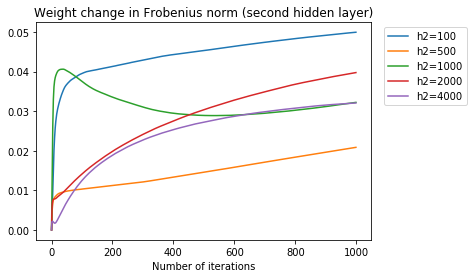

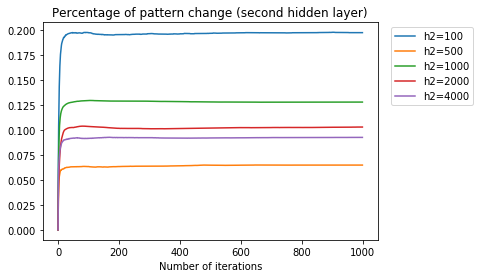

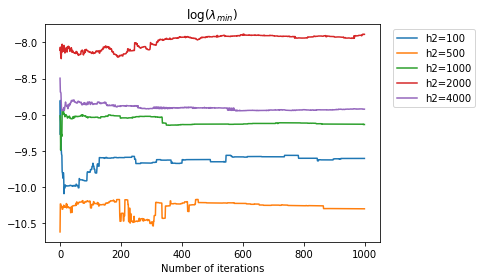

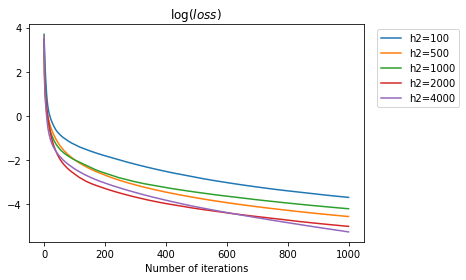

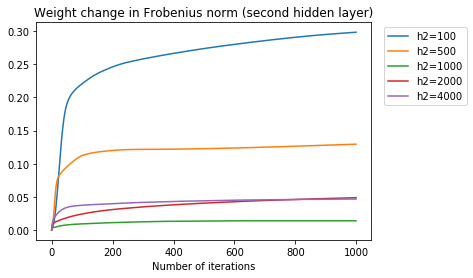

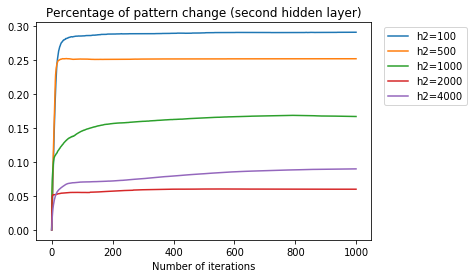

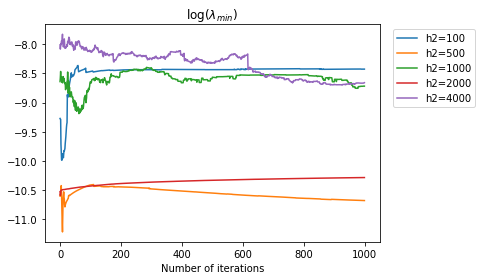

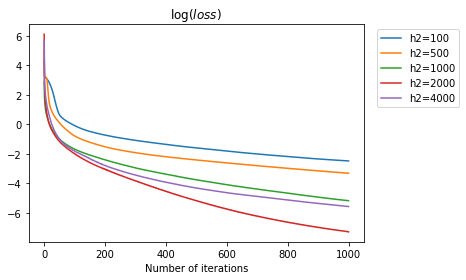

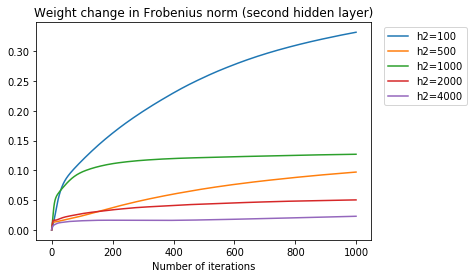

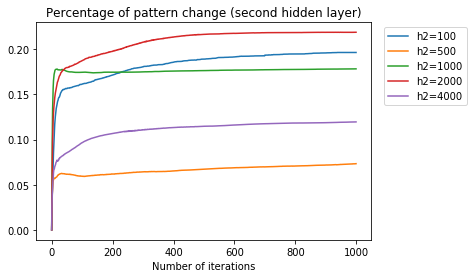

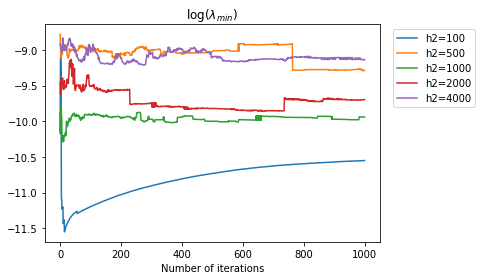

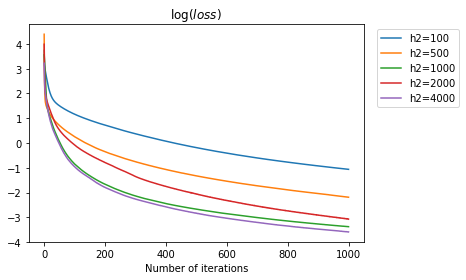

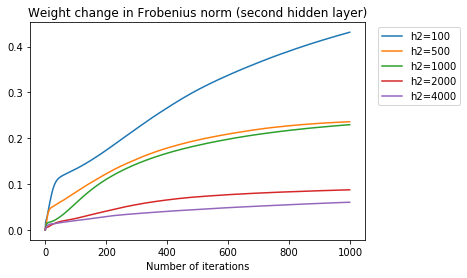

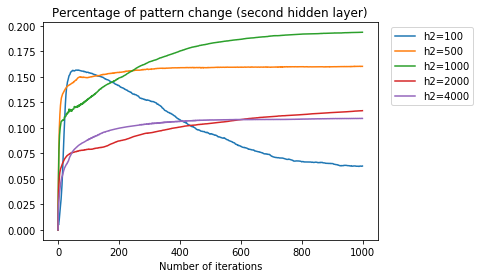

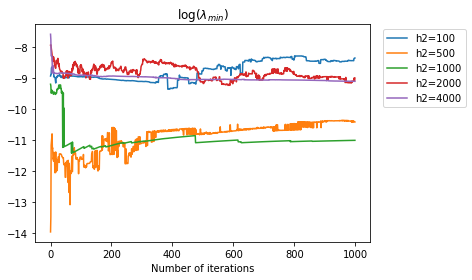

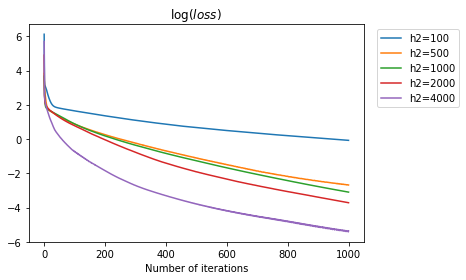

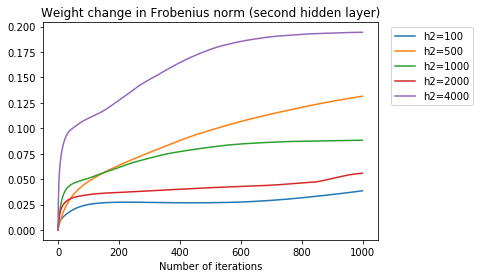

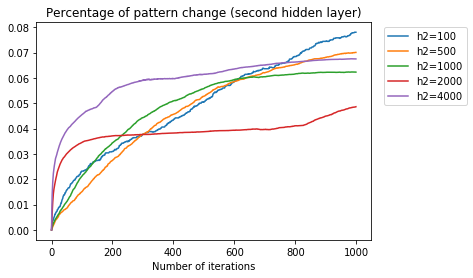

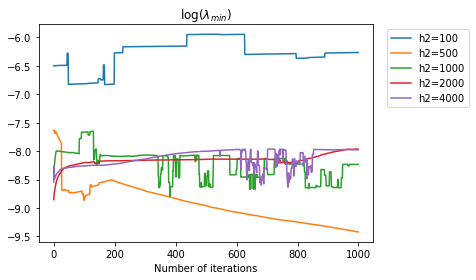

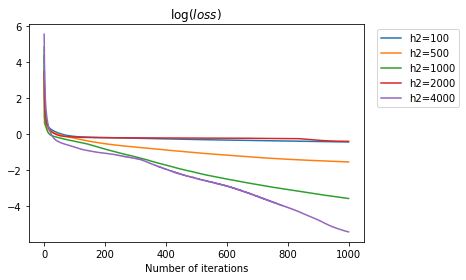

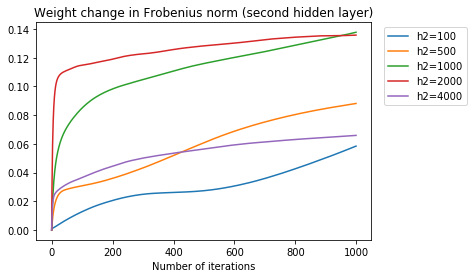

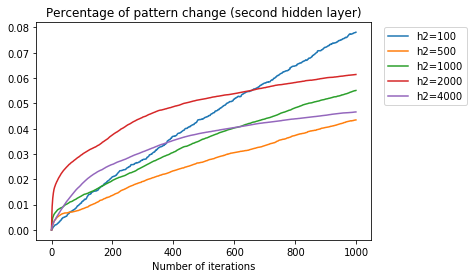

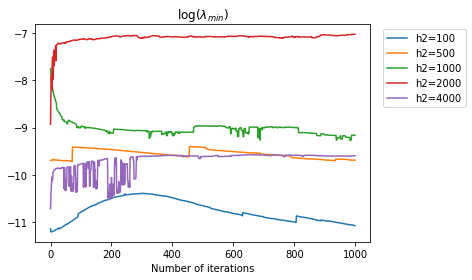

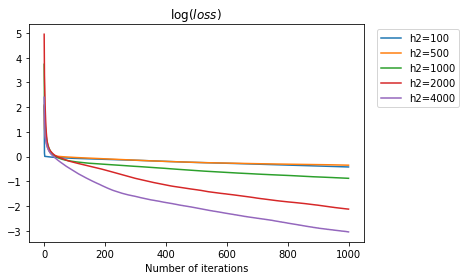

In [24]:
plot_all(dataset_name='MNIST01')
plot_all(dataset_name='MNIST17')
plot_all(dataset_name='Fashion01')
plot_all(dataset_name='Fashion79')
plot_all(dataset_name='synthetic50')
plot_all(dataset_name='synthetic100')

In [9]:
import torchvision

In [37]:
def save_train_data(dataset='MNIST', label=0, num=3):
    if dataset == 'MNIST':
        data = torchvision.datasets.MNIST(root='./data')
    if dataset == 'Fashion':
        data = torchvision.datasets.FashionMNIST(root='./data')
    ind = []
    i = 0
    while len(ind) < num:
        if data.train_labels[i] == label:
            ind.append(i)
        i += 1
    for n,i in enumerate(ind):    
        plt.imshow(data.train_data[i])
        plt.savefig('./plots/sample_' + dataset + str(label) + '_' + str(n+1) + '.pdf')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


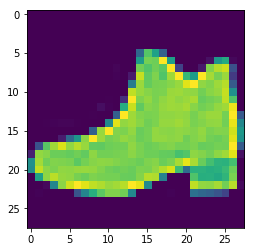

In [38]:
save_train_data(dataset='MNIST', label=0, num=3)
save_train_data(dataset='MNIST', label=1, num=3)
save_train_data(dataset='MNIST', label=7, num=3)
save_train_data(dataset='Fashion', label=0, num=3)
save_train_data(dataset='Fashion', label=1, num=3)
save_train_data(dataset='Fashion', label=7, num=3)
save_train_data(dataset='Fashion', label=9, num=3)